# Get the Data

In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## get the data from csv
df = pd.read_csv("student_mat.csv", sep=';')

In [3]:
## inspect the dataframe
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Engineer Target 

In [4]:
## engineer a an average grade feature that is an average of all three grades for the year
## round avg grade for three years to 2 decimal places
df['avg_grade'] = round((df['G1'] + df['G2'] + df['G3']) / 3, 2)

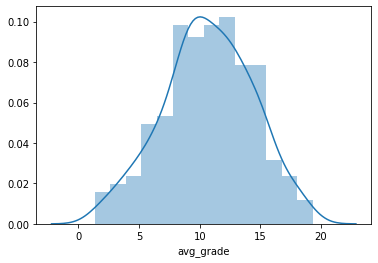

In [5]:
## check distribution of avg_grade for skewness
sns.distplot(df['avg_grade'])

## Encode Average Grade

In [6]:
# Create a list to store the data
grade_status = []

# For each row in the column,
for row in df['avg_grade']:
    if row >= 16:
        grade_status.append('advanced')
    elif row > 10:
        grade_status.append('proficient')
    elif row >= 0:
        grade_status.append('fail')
   
        
# Create a column from the list
df['grade_status'] = grade_status

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grade,grade_status
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.67,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.33,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.33,fail
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.67,proficient
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.67,fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,4,4,5,4,11,9,9,9,9.00,fail
391,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,3,14,16,16,15.33,proficient
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,3,3,10,8,7,8.33,fail
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,3,4,5,0,11,12,10,11.00,proficient


# Mean Baselines

In [7]:
df['grade_status'].value_counts()

proficient    187
fail          179
advanced       29
Name: grade_status, dtype: int64

In [8]:
df['grade_status'].value_counts(normalize= True)

proficient    0.473418
fail          0.453165
advanced      0.073418
Name: grade_status, dtype: float64

## Visualize correlations to look for leakage/dependencies

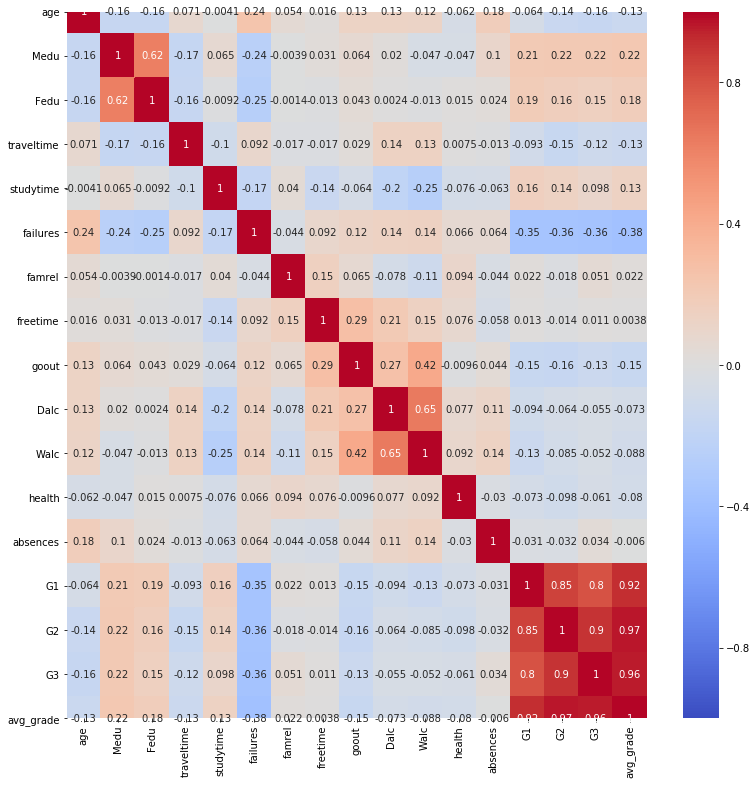

In [9]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.show()

# Keep original dataframe safe

In [10]:
original_df = df

# Question: Can we use out of school factors to predict the average grade in a Mathematics class?

In [12]:
## check for missing values
df.isnull().sum()

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
avg_grade       0
grade_status    0
dtype: int64

In [13]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 

df['school']= le.fit_transform(df['school']) 
df['sex']= le.fit_transform(df['sex']) 
df['address']= le.fit_transform(df['address'])
df['famsize']= le.fit_transform(df['famsize']) 
df['Pstatus']= le.fit_transform(df['Pstatus']) 
df['Mjob']= le.fit_transform(df['Mjob']) 
df['Fjob']= le.fit_transform(df['Fjob']) 
df['reason']= le.fit_transform(df['reason']) 
df['guardian']= le.fit_transform(df['guardian']) 
df['schoolsup']= le.fit_transform(df['schoolsup']) 
df['famsup']= le.fit_transform(df['famsup']) 
df['paid']= le.fit_transform(df['paid']) 
df['activities']= le.fit_transform(df['activities']) 
df['nursery']= le.fit_transform(df['nursery']) 
df['higher']= le.fit_transform(df['higher']) 
df['internet']= le.fit_transform(df['internet']) 
df['romantic']= le.fit_transform(df['romantic']) 
df['grade_status']= le.fit_transform(df['grade_status']) 

# Features Matrix and Target Vector

In [14]:
## features matrix without target (grade_status) and all grade features
## also remove internet, romantic, freetime, famsize
X = df.drop(columns = ['grade_status', 'avg_grade', 'G1', 'G2', 'G3',
                        'romantic', 'freetime', 'famsize', 'internet'])

## target vector dependent variable final grade (G3)
y = df['grade_status']

In [16]:
from sklearn.model_selection import train_test_split

## first split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=14)


## next split train into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=14)

In [17]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(learning_rate=0.5,
                    n_estimators=150,
                    max_depth=6,
                    min_child_weight=0,
                    gamma=0,
                    reg_lambda=1,
                    subsample=1,
                    colsample_bytree=0.75,
                    scale_pos_weight=1,
                    objective='multi:softprob',
                    num_class=3,
                    random_state=14)

mcl = xgbc.fit(X_train, y_train, eval_metric='merror')
y_pred = mcl.predict(X_train)
y_proba = mcl.predict_proba(X_train)

In [19]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(),
    
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

## scoring with merror because it is a multiclass situation

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, early_stopping_rounds=100)

[0]	validation_0-merror:0.361111	validation_1-merror:0.4375
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.31746	validation_1-merror:0.46875
[2]	validation_0-merror:0.325397	validation_1-merror:0.375
[3]	validation_0-merror:0.31746	validation_1-merror:0.375
[4]	validation_0-merror:0.321429	validation_1-merror:0.34375
[5]	validation_0-merror:0.321429	validation_1-merror:0.34375
[6]	validation_0-merror:0.309524	validation_1-merror:0.328125
[7]	validation_0-merror:0.313492	validation_1-merror:0.328125
[8]	validation_0-merror:0.325397	validation_1-merror:0.34375
[9]	validation_0-merror:0.321429	validation_1-merror:0.328125
[10]	validation_0-merror:0.321429	validation_1-merror:0.34375
[11]	validation_0-merror:0.301587	validation_1-merror:0.34375
[12]	validation_0-merror:0.293651	validation_1-merror:0.328125
[13]	validation_0-merror:0.281746	validatio

[129]	validation_0-merror:0.027778	validation_1-merror:0.296875
[130]	validation_0-merror:0.027778	validation_1-merror:0.296875
Stopping. Best iteration:
[30]	validation_0-merror:0.178571	validation_1-merror:0.28125



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

1.0

In [33]:
y_pred_val = mcl.predict(X_val)
y_pred_val1 = model.predict(X_val)

In [24]:
accuracy_score(y_val, y_pred_val)

0.640625

In [34]:
accuracy_score(y_val, y_pred_val1)

0.71875

In [35]:
y_pred_test = mcl.predict(X_test)
y_pred_test1 = model.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred_test)

0.5063291139240507

In [36]:
accuracy_score(y_test, y_pred_test1)

0.5316455696202531

In [27]:
## labels=["ant", "bird", "cat"]
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred_test)

array([[[72,  0],
        [ 6,  1]],

       [[25, 18],
        [16, 20]],

       [[22, 21],
        [17, 19]]])

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.53      0.56      0.54        36
           2       0.47      0.53      0.50        36

    accuracy                           0.51        79
   macro avg       0.67      0.41      0.43        79
weighted avg       0.54      0.51      0.50        79



In [31]:
x = y_test == y_pred_test

In [32]:
x.value_counts()

True     40
False    39
Name: grade_status, dtype: int64

In [37]:
## change the pipline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='most_frequent'),  
    RandomForestClassifier(n_estimators=72, random_state=14, n_jobs=-1)
)

## Fit on train
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='most_frequent',
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_sa

In [38]:
y_pred_val2 = pipeline.predict(X_val)

In [39]:
accuracy_score(y_val, y_pred_val2)

0.65625

In [40]:
y_pred_test2 = pipeline.predict(X_test)
accuracy_score(y_test, y_pred_test2)

0.5443037974683544